## **Getting Started with the Gemini API**

---


> **Objective:** In this lecture, the aim is to provide an introduction to Gemini, exploring its capabilities, applications, and how you, as budding AI enthusiasts, can harness its potential using the Gemini API.

## 1.1 **A Glimpse into Google’s Multi-modal Language Model: Gemini**

In the rapidly evolving field of artificial intelligence, one of the most exciting developments is the advent of multi-modal language models. Google’s Gemini, a state-of-the-art multi-modal language model, represents a significant leap forward in this area.

### What is Gemini?

Gemini is Google's latest multi-modal language model designed to process and generate human-like text across different modalities. Unlike traditional language models that focus solely on text, multi-modal models like Gemini integrate various forms of data, such as text, images, and even audio. This capability enables Gemini to understand and generate contextually relevant content across multiple mediums, offering a more holistic approach to language processing.

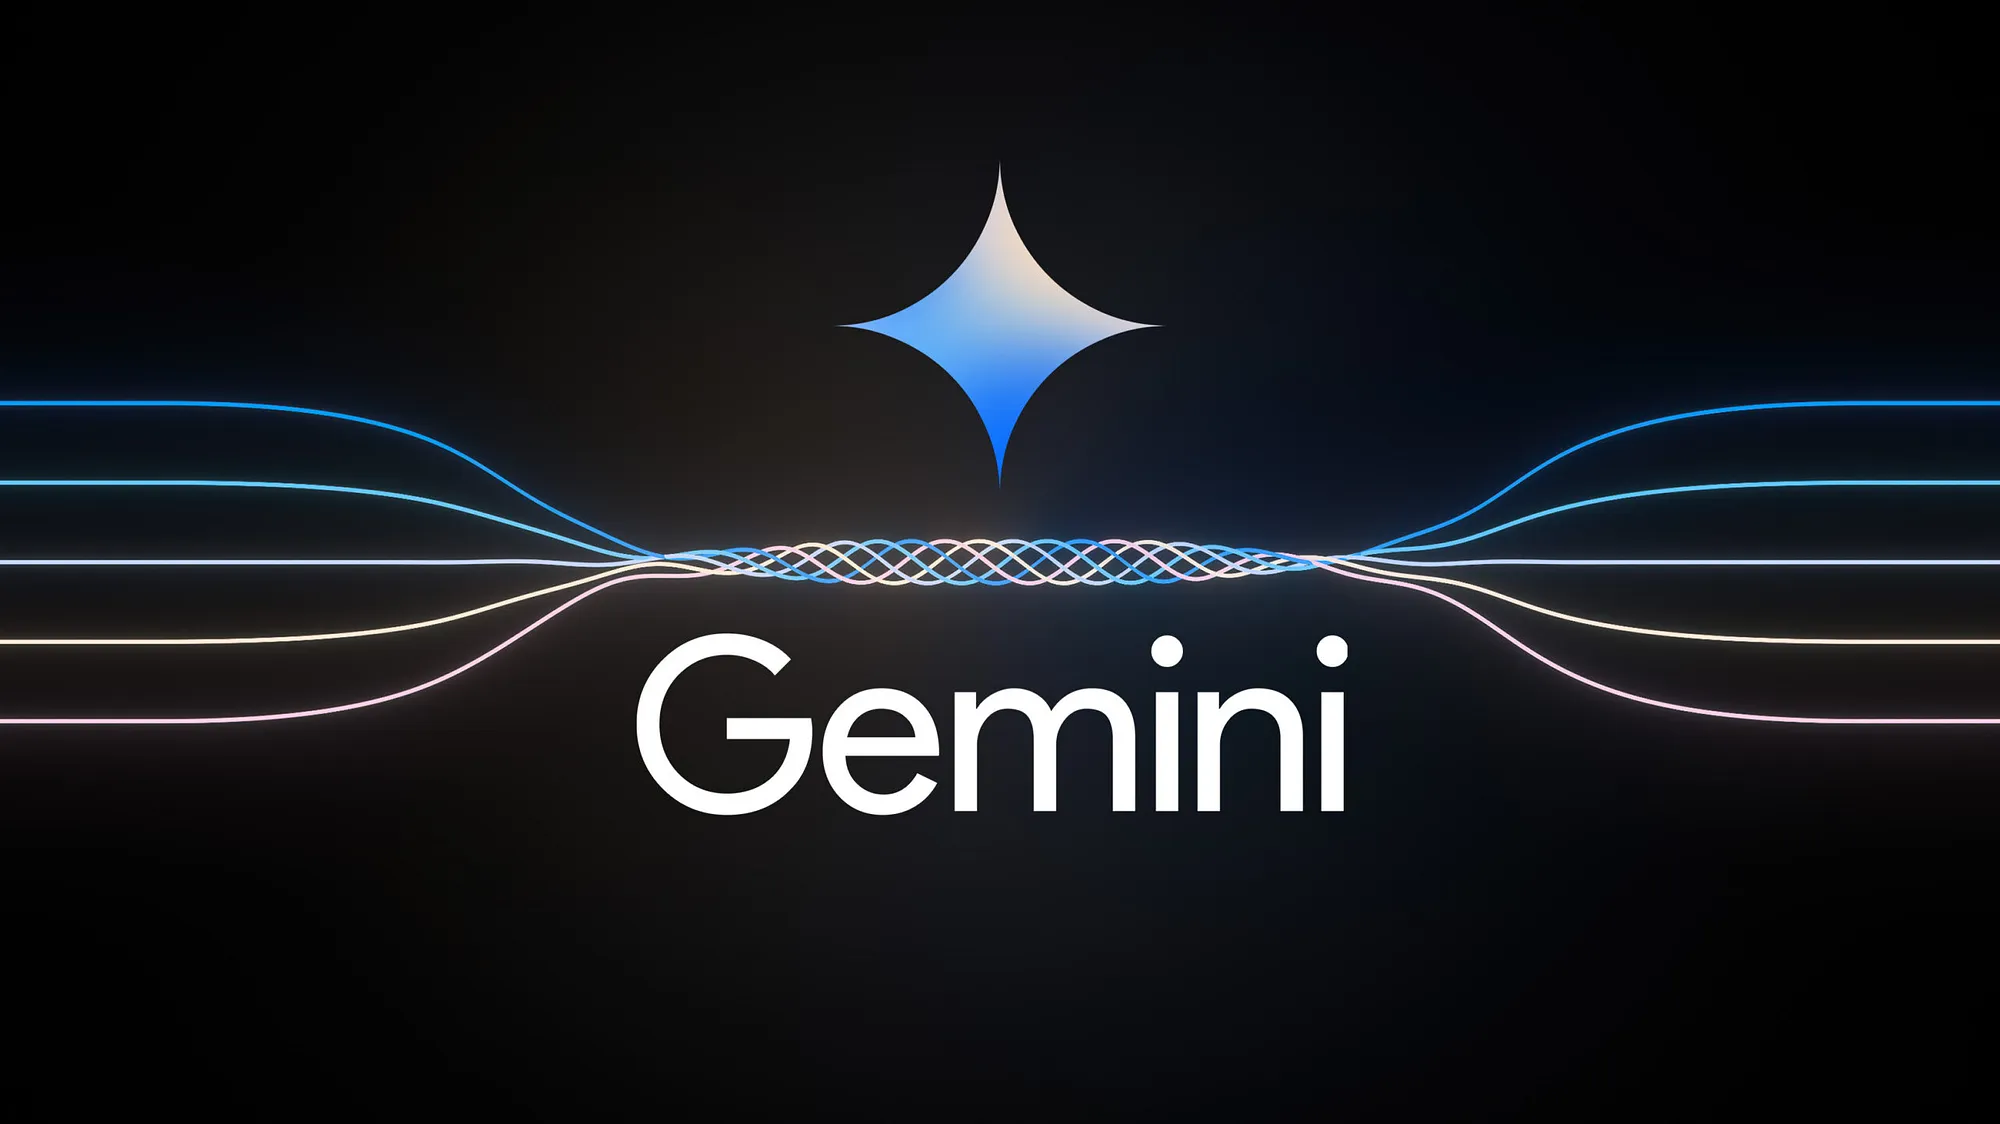

### Core Capabilities of Gemini

1. **Text Understanding and Generation**: Gemini excels at comprehending and generating high-quality text. It can answer questions, summarize content, translate languages, and even create creative content like stories and poems.
  
2. **Image Processing**: One of the standout features of Gemini is its ability to analyze and generate images. It can interpret visual data, describe images in natural language, and even create new images from textual descriptions.

3. **Audio Integration**: Though still in developmental stages, Gemini has promising potential in integrating audio processing capabilities. This means it can understand spoken language and generate audio outputs, bridging the gap between textual and auditory data.

### Applications of Gemini

Gemini’s multi-modal capabilities open up a plethora of applications across various fields:

1. **Education**: Teachers can use Gemini to create engaging multimedia educational content, provide real-time language translation for multilingual classrooms, and generate personalized learning materials for students.

2. **Healthcare**: In healthcare, Gemini can assist in creating comprehensive patient reports that include textual descriptions and relevant medical images. It can also aid in telemedicine by providing accurate translations and summarizing patient histories.

3. **Entertainment**: The entertainment industry can leverage Gemini to generate scripts, create storyboards from textual descriptions, and even design interactive content that blends text, images, and audio.

4. **Business and Marketing**: Companies can utilize Gemini for market analysis, generating marketing content, and creating detailed visual reports that combine textual and visual data to provide insightful business intelligence.






## **Install the Python SDK**

An SDK is a set of tools to build software for a particular platform. These tools also allow developers build applications which can integrate with another program (In our case, the Gemini Model). `generative-ai-python` is a python package created to enable developers use Google's state-of-the-art generative AI models to build AI-powered features and applications.

We will install the dependency using pip:

In [ ]:
pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.3/717.3 kB 11.3 MB/s eta 0:00:00


## **Import packages**
Import the necessary packages.

In [1]:
import os
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

c:\Users\Aduragbemi\Documents\SeqHub-LLM-Internship\seqhub\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Used to securely store your API key
# from google.colab import userdata

## **Setup your API key**
Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in [Google AI Studio](https://ai.google.dev/aistudio).

**Reference:** Watch the video below for a guided approach to otaining a Gemini API key.



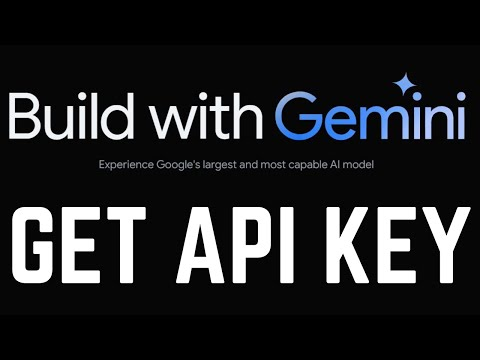

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('OVnnVnLZPEo', width=1000, height=500)

## **API Authentication**
Next, you will retrieve your API key from Google Cloud Console. This key will authenticate your requests to the Gemini API.

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

1. Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
2. Pass the key to `genai.configure(api_key=...)`

- <font color="red">Warning</font>: Ensure that there are no whitespaces in your API key.


In [3]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY= os.getenv('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## **What models can be used with the python SDK?**

Now you're ready to call the Gemini API. Use list_models to see the available Gemini models:

- gemini-pro: optimized for text-only prompts.
- gemini-pro-vision: optimized for text-and-images prompts.

For a more holisitic view of Gemini Models, see [Gemini - DeepMind](https://deepmind.google/technologies/gemini/)

### **Making Requests**

In this section, you’ll learn how to use the API to send requests to Gemini. For text-related tasks, use endpoints designed for text generation or analysis. For image-related tasks, utilize the endpoints that handle image data.

Now that you’re ready to call the Gemini API. You can use the `list_models` method to see the available Gemini models that can generate content. We’ll quickly iterate through the models available in the genai module and check if each model supports a method named `generateContent`.



In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-think



•	**gemini-pro:** Optimized for text-only prompts.

•	**gemini-pro-vision:** Optimized for text-and-image prompts.

•	**gemini-flash:** Optimized for high-volume, high-frequency tasks at scale and is less expensive to serve

Let's initialize one of the generative models: `gemini-pro`

In [5]:
model = genai.GenerativeModel('gemini-pro')

### **Generate Text**

Now it’s time to generate some text! There are two methods to generate text depending on the length of your input.



1. **Direct Method:** Generate a response from the model by passing the full input sequence.

Let's try an example: We will send a prompt to the `gemini-pro` model asking about the future of AI in one sentence.

The response is expected to contain the generated content (`response.text`), feedback about the prompt (`response.prompt_feedback`), and a list of candidate responses (`response.candidates`).

In [7]:
response = model.generate_content("What is the future of AI in one sentence?")

ResourceExhausted: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateContent request limit per minute for a region' of service 'generativelanguage.googleapis.com' for consumer 'project_number:790379948442'. [reason: "RATE_LIMIT_EXCEEDED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_unit"
  value: "1/min/{project}/{region}"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "europe-west1"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/790379948442"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
]

In [15]:
response2 = model.generate_content("For a vision task, what is the best AI model to use?, I want the answer in not more than 100 words")

ResourceExhausted: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateContent request limit per minute for a region' of service 'generativelanguage.googleapis.com' for consumer 'project_number:790379948442'. [reason: "RATE_LIMIT_EXCEEDED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "europe-west1"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/790379948442"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
]

How do we extract our response? Thsi is achieved using the `.text` attribute.

In [ ]:
print(response.text)

AI's future lies in its transformative potential to reshape industries, empower individuals, and unlock new frontiers of innovation and discovery.


In [ ]:
print(response2.text)

The optimal AI model for a vision task depends on the specific task and dataset. However, for general vision tasks, popular models include:

* **Convolutional Neural Networks (CNNs)**: Specialized for image recognition and object detection.
* **Transformer models**: Utilize self-attention mechanisms for image classification and segmentation.
* **Generative Adversarial Networks (GANs)**: Generate realistic images or enhance existing ones.

The choice of model should consider factors such as accuracy, efficiency, and computational resources.


The Python package also provides functionalities to view the top response candidates from Gemini. Currently, only the first-choice response can be extracted. For a detailed understanding of each of these parameters, refer to the [documentation](https://ai.google.dev/api/rest/v1/GenerateContentResponse#candidate).

In [ ]:
print(response.candidates)

[content {
  parts {
    text: "AI\'s future lies in its transformative potential to reshape industries, empower individuals, and unlock new frontiers of innovation and discovery."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]


2. **Streaming Method:** The model typically delivers a response once the full generation process is concluded. However, there is an option to receive the response in a streaming manner. In this mode, the model provides segments of the response incrementally as they are produced.
You can add a parameter called `Stream` with `True` value. In this case, the response will be returned as chunks each time the content is generated. This might be useful for handling larger responses or real-time data streaming. We will iterate over the chunks of the response, printing each chunk followed by a line of underscores for separation.

In [ ]:
response = model.generate_content("What is the future of AI?", stream=True)
for chunk in response:
  print(chunk.text)
  #print("_"*80)

**Advancements in Machine Learning and Deep Learning:**

* Improved natural language processing
 (NLP) capabilities, leading to enhanced chatbots, language translation, and text analysis.
* More sophisticated computer vision algorithms, enabling tasks such as object recognition
, facial analysis, and medical diagnosis.
* Generative adversarial networks (GANs) generating realistic images, text, and music.

**Integration with Other Technologies:**

* AI-powered devices becoming ubiquitous in homes, cities, and industries.
* Integration with 5G and edge computing enhancing real-time
 processing and decision-making.
* AI-driven cybersecurity systems protecting against threats.

**Focus on Human-Centered AI:**

* AI systems becoming more transparent, explainable, and ethical.
* Emphasis on AI as a tool to augment human capabilities, rather than replace them.
* Development of AI ethics frameworks and guidelines.

**Applications in Various Industries:**

* Healthcare: Personalized medicine, d



### **Integrating Multi-modal Data (Vision)**

To utilize Gemini’s multi-modal capabilities, combine different types of data in your requests. For example, you can send a textual description and receive an image or send an image and receive a textual analysis.

Ever heard of the stonehenge 🧙✨ before? It was one of the seven ancient wonders of the world. Let's ask Gemini to generate an article given an image of the Stonehenge in England.

Download the image from [Stonehenge](https://assets.editorial.aetnd.com/uploads/2015/08/stonehenge-gettyimages-599815110-1.jpg), Rename as `stonehenge` and upload to colab.

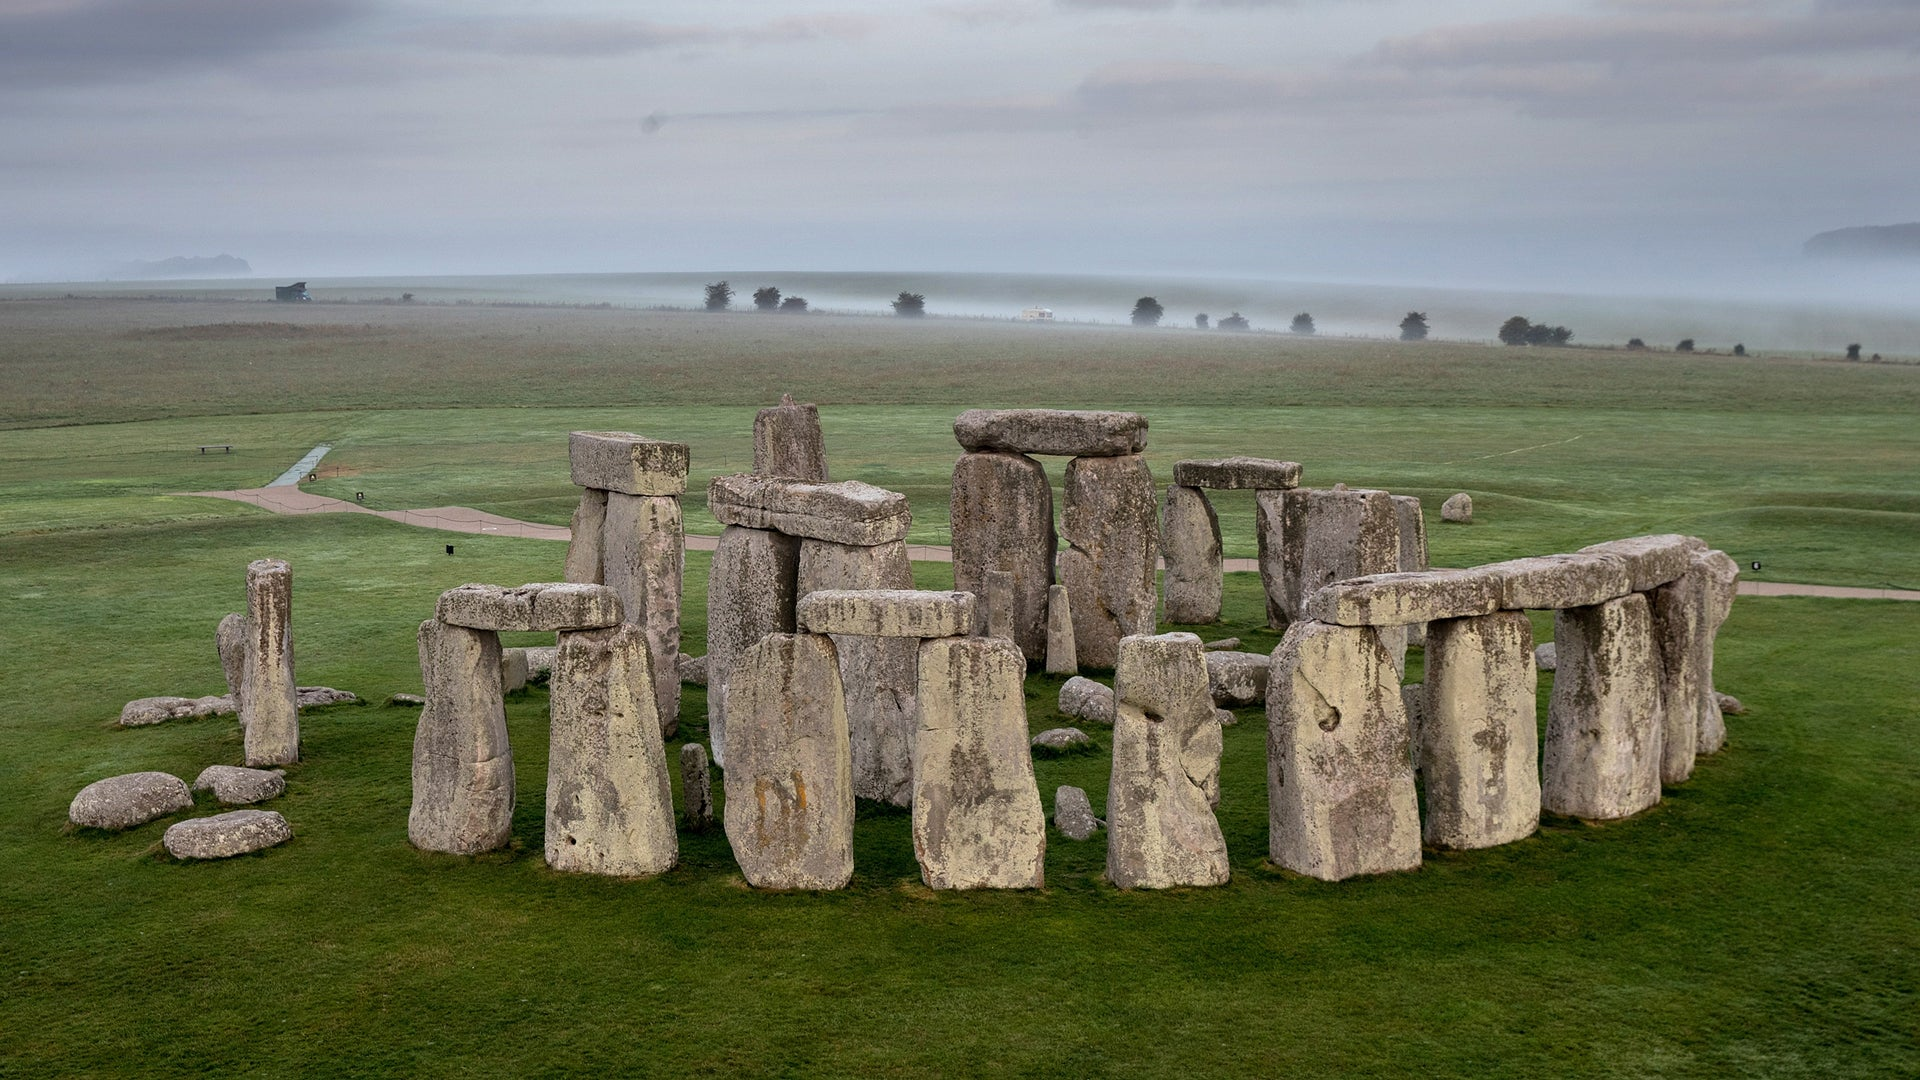

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# Stonehenge image URL
image_url = "https://assets.editorial.aetnd.com/uploads/2015/08/stonehenge-gettyimages-599815110-1.jpg"

# Send a request to fetch the image
url_response = requests.get(image_url)

# Check if the request was successful
if url_response.status_code == 200:
    # Open the image using PIL
    image = Image.open(BytesIO(url_response.content))

else:
    print(f"Failed to retrieve image. Status code: {url_response.status_code}")
#show image
image

In [ ]:
## Initialize Vison Model
vision_model = genai.GenerativeModel('gemini-pro-vision')

#Generate Text Article
vision_response = vision_model.generate_content(["Tell me what you see in this picture. Then, write a short, engaging blog article based on this picture.", image], stream=False)


In [ ]:
vision_response.resolve()
to_markdown(vision_response.text)

>  # Stonehenge: A Wonder of the Ancient World
> 
> Stonehenge is a prehistoric monument in Wiltshire, England. It consists of a ring of standing stones, each around 13 feet (4 meters) high, 7 feet (2 meters) wide, and weighing around 25 tons. The stones are set in a circle about 300 feet (90 meters) in diameter. The purpose of Stonehenge is unknown, but it is thought to have been a religious or ceremonial site. It was built in several stages, beginning around 3000 BC. The stones were brought to the site from around 20 miles (32 kilometers). Stonehenge is one of the most famous prehistoric monuments in the world.
> 
> ## What is the purpose of Stonehenge?
> 
> The purpose of Stonehenge is unknown, but there are many theories. Some believe that it was a religious or ceremonial site, while others believe that it was an astronomical observatory. There is evidence to support both of these theories. For example, the stones are aligned with the summer and winter solstices, which suggests that it may have been used to track the seasons. Additionally, there are many carvings on the stones that depict animals and other symbols, which may have had religious or spiritual significance.
> 
> ## How was Stonehenge built?
> 
> Stonehenge was built in several stages, beginning around 3000 BC. The stones were brought to the site from around 20 miles (32 kilometers). The stones were then erected in a circle about 300 feet (90 meters) in diameter. The stones were placed in a circle using a system of levers and pulleys. The stones were then fitted together using a system of interlocking joints.
> 
> ## Who built Stonehenge?
> 
> The people who built Stonehenge are unknown. However, there are many theories about who they may have been. Some believe that it was built by the Celts, while others believe that it was built by the Romans. There is evidence to support both of these theories. For example, there are many Celtic symbols carved into the stones, which suggests that it may have been built by the Celts. Additionally, there are many Roman artifacts that have been found at the site, which suggests that it may have been built by the Romans.
> 
> ## Stonehenge Today
> 
> Stonehenge is one of the most famous prehistoric monuments in the world. It is a popular tourist destination, and it is also a UNESCO World Heritage Site. Stonehenge is a reminder of the ingenuity and creativity of the people who built it. It is also a reminder of the mysteries of the past.

## **Chat Conversations**

Gemini facilitates multi-turn, freeform conversations. By using the `ChatSession` class, you can streamline the process by handling the conversation’s state management automatically. This approach contrasts with the `generate_content` method, as it eliminates the need to manually maintain the conversation history in a list format.

To begin, we need to initialize the chat and send the first message. We will be using full process completion for this demonstration. This approach improves clarity and conciseness, making it easier to understand the purpose and process of using the ChatSession class with Gemini.

In [ ]:
# Loading Gemini Pro
model = genai.GenerativeModel('gemini-pro')

# Initialize the Chat model
gemini_chat = model.start_chat()

In [ ]:
# We are going to send the first message
response1 = gemini_chat.send_message("Hello my name is Aduragbemi")
to_markdown(response1.text)

> Hello Aduragbemi, it's nice to meet you!

In [ ]:
# Sending the second message
response2 = gemini_chat.send_message("what was the first thing i sent and the second text you sent")
to_markdown(response2.text)

> 1. The first thing you sent was: "Hello my name is Aduragbemi"
> 
> 2. The second text I sent was: "Hello Aduragbemi, it's nice to meet you!"
> 
> I am still under development, and I am always learning new things. I appreciate your feedback, and I will try my best to improve my responses in the future.

In [ ]:
response3 = gemini_chat.send_message("How effectively can I manage time? in less than 100 words.")
to_markdown(response3.text)

> **Effective Time Management in Under 100 Words:**
> 
> * Prioritize tasks based on importance and urgency.
> * Break down large tasks into smaller, manageable chunks.
> * Schedule specific time slots for different tasks and stick to the schedule.
> * Minimize distractions and take regular breaks.
> * Delegate tasks to others when possible.
> * Learn to say no to additional commitments.
> * Review and adjust your time management strategies regularly.
> 
> By following these tips, you can effectively manage your time, improve your productivity, and reduce stress.

Moreover, you can access the whole chat in order to create your own conversation or even create a chat history using the following code.



In [ ]:
gemini_chat.history

[parts {
   text: "Hello my name is Aduragbemi"
 }
 role: "user",
 parts {
   text: "Hello Aduragbemi, it\'s nice to meet you!"
 }
 role: "model",
 parts {
   text: "what was the first thing i sent and the second text you sent"
 }
 role: "user",
 parts {
   text: "1. The first thing you sent was: \"Hello my name is Aduragbemi\"\n2. The second text I sent was: \"Hello Aduragbemi, it\'s nice to meet you!\""
 }
 role: "model",
 parts {
   text: "How effectively can I manage time?"
 }
 role: "user",
 parts {
   text: "**Effective Time Management Techniques**\n\n**1. Prioritize Tasks:**\n* Use the Eisenhower Matrix to categorize tasks based on urgency and importance.\n* Focus on completing high-priority tasks first.\n\n**2. Break Down Large Tasks:**\n* Divide large, overwhelming projects into smaller, manageable chunks.\n* This makes tasks seem less daunting and easier to start.\n\n**3. Schedule Time Blocks:**\n* Allocate specific time slots in your day for different tasks.\n* Stick to the 

The results are between user and AI model roles, with each part containing a text field for the message content and a role field indicating the speaker. This structure is essential for documenting the conversational flow and context, beneficial for training AI models or for record-keeping purposes.

### **Conclusion**

We have explored how to interact with the Gemini API using the Python SDK. From our experience with the vision model, we can see that Google’s Gemini represents a transformative step in AI, seamlessly integrating multiple forms of data to provide a richer, more nuanced understanding of the world.

By harnessing the power of the Gemini API, you can explore new frontiers in AI applications, making your projects more innovative and impactful. As we go deeper into using the Gemini API in our upcoming sessions, remember that the key to mastering this technology lies in experimentation and continuous learning. Embrace the possibilities that Gemini offers and let your creativity guide you in uncovering its full potential.